# OZNAL - Exploratívna analýza
Miroslav Čulík, Andrej Gáfrik

## Opis problému, motivácia

V našom projekte by sme chceli sa chceli zaoberať problémom predikcie cien nehnuteľností na základe dostupných atribútov o týchto nehnuteľnostiach. Spomínaná úloha predikcie môže pomôcť lepšie odhadnúť skutočnú cenu nehnuteľností pri ich predajoch a nákupoch. 

Našou motiváciou je získanie skúsenosti s metódami dátovej analýzy a algoritmov strojového učenia.

## Opis dát spolu s charakteristikami dát

Nami zvolený dataset obsahuje údaje o domoch, ktoré boli predané v USA (oblasť King County) v období máj 2014 až máj 2015.
Dáta sme získali z portálu *kaggle.com* vo formáte **.csv** súboru ([link](https://www.kaggle.com/harlfoxem/housesalesprediction))

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from dateutil.parser import parse

pd.set_option('max_rows', None)
pd.set_option('max_columns', None)

In [2]:
path_housing = "data\\kc_house_data.csv"
df = pd.read_csv(path_housing, sep=",")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Zobrazíme si všeobecné údaje o našom datasete:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


Ako je možné vidieť, náš dataset má 21 stĺpcov, pričom okrem jedného prípadu ide o numerické atribúty.
Charakteristika jednotlivých atribútov:
- **id**  -index inštancie
- **date** - dátum predaja nehnuteľnosti
- **price** - cena nehnuteľnosti (pravdepodobne v $)
- **bedrooms** - počet spální v nehnuteľnosti
- **bathrooms** - počet kúpeľní v nehnuteľnosti
- **sqft_living** - rozloha obytného priestoru v stopách štvorcových (square feet)
- **sqft_lof** - rozloha celého pozemku v stopách štvorcových (square feet)
- **floors** - počet poschodí
- **waterfront** - či z nehnuteľnosti je výhľad na pobrežie
- **view** - index kvality výhľadu z nehnuteľosti
- **condition** - stav nehnuteľnosti
- **grade** - stupeň vnútorného zariadenia
- **sqft_above** - rozloha obytného priestoru v nadzemnej časti budovy v stopách štvorcových (square feet)
- **sqft_basement** - rozloha obytného priestou v suteréne v stopách štvorcových (square feet)
- **yr_built** - rok postavenia nehnuteľnosti
- **yr_renovated** - rok renovovania nehnuteľnosti
- **zipcode** - poštové smerovacie číslo
- **lat** - zemepisná šírka (severná šírka)
- **long** - zemepisná dĺžka (západná dĺžka)
- **sqft_living15** - rozloha obytného priestoru pre najbližších 15 susedných nehnuteľností
- **sqft_lot15** - rozloha celého pozemku pre najbližších 15 susedných pozemkov

Prehľad charakteristík numerických atribútov

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Prehľad charakteristík nenumerických atribútov

In [5]:
df.describe(exclude=np.number)

,date
count,21613
unique,372
top,20140623T000000
freq,142


### Analýza jednotlivých atribútov:

#### Stĺpec id

In [6]:
df["id"].value_counts()

795000620     3
2206700215    2
643300040     2
3333002450    2
1995200200    2
             ..
3420069065    1
7812801125    1
4364700875    1
3021059276    1
1777500160    1
Name: id, Length: 21436, dtype: int64

In [7]:
df[df.groupby(["id"])["id"].transform("size") == 2]["id"].nunique()

175

In [8]:
df[df.groupby(["id"])["id"].transform("size") > 2]["id"].nunique()

1

In [9]:
df[df.groupby(["id"])["id"].transform("size") == 1]["id"].nunique()

21260

Nie všetky hodnoty stĺpca `id` sa nachádzajú iba raz, 175 sa nachádza 2 razy a jedna hodnota `id` sa nachádza 3 razy

In [15]:
df[df["id"]==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17602,795000620,20140924T000000,115000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250
17603,795000620,20141215T000000,124000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250
17604,795000620,20150311T000000,157000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250


#### Stĺpec date

In [43]:
df["date"] = df["date"].apply(lambda x: parse(x, dayfirst=False))
df["date"] = pd.to_datetime(df["date"], infer_datetime_format=True)

In [44]:
df["date"].value_counts()

2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
2015-03-25    123
2014-07-09    121
2015-04-14    121
2015-04-22    121
2015-04-28    121
2014-06-24    120
2015-04-21    119
2014-10-28    117
2014-08-26    117
2014-05-20    116
2014-07-14    116
2014-07-01    115
2014-08-20    114
2015-04-29    114
2014-06-17    113
2015-04-08    112
2014-07-29    112
2014-05-28    111
2014-07-16    111
2014-08-05    110
2015-04-23    110
2015-03-27    109
2014-08-25    109
2014-08-11    107
2014-06-20    107
2014-07-23    107
2015-03-26    105
2014-07-22    105
2014-06-03    104
2014-05-27    104
2014-08-22    103
2015-04-02    103
2014-09-23    103
2015-04-24    103
2015-05-04    102
2014-08-27    102
2015-04-07    102
2014-07-15    102
2014-07-25    102
2014-06-19    101
2015-03-24    101
2014-11-13    100
2014-07-18    100
2014-06-04    100
2014-08-12    100
2015-03-04    100
2014-09-24     99
2014-06-18     99
2014-06-10     98
2015-02-24     98
2014-12-02

In [46]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
pd.DataFrame(df.groupby(df["date"].dt.weekday_name)["id"].count()).reindex(days)

,id
date,
Monday,4099
Tuesday,4715
Wednesday,4603
Thursday,3994
Friday,3685
Saturday,287
Sunday,230


Najviac predaných nehnuteľností v rámci dní v týždni bolo zaznamenaných v utorok, najmenej cez víkend

In [34]:
df.groupby(df["date"].dt.month)["id"].count()

date
1      978
2     1250
3     1875
4     2231
5     2414
6     2180
7     2211
8     1940
9     1774
10    1878
11    1411
12    1471
Name: id, dtype: int64

V rámci mesiacov bolo najviac predajov v mesiaci máj, avšak tento mesiac sa ako jediný v dátach vyskytuje pre 2 roky

In [35]:
df.resample("M", on="date")["id"].count()

date
2014-05-31    1768
2014-06-30    2180
2014-07-31    2211
2014-08-31    1940
2014-09-30    1774
2014-10-31    1878
2014-11-30    1411
2014-12-31    1471
2015-01-31     978
2015-02-28    1250
2015-03-31    1875
2015-04-30    2231
2015-05-31     646
Freq: M, Name: id, dtype: int64

Za najproduktívnejšie obdobie môžeme označiť máj v roku 2014

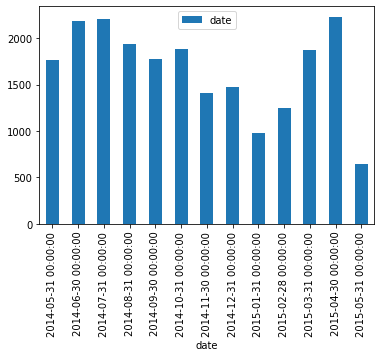

In [36]:
pd.DataFrame(df.resample("M", on="date")["date"].count()).plot(kind="bar")

In [37]:
df[df.groupby(["date"])["id"].transform("size") > 1]["date"].nunique()

358

In [38]:
min_date = min(df["date"])
max_date = max(df["date"])
print(f"Minimalny datum {min_date}, maximalny datum {max_date}")
print(max_date-min_date)

Minimalny datum 2014-05-02 00:00:00, maximalny datum 2015-05-27 00:00:00
390 days 00:00:00


V stĺpci `date` máme rozdiel 390 dní, pričom unikátnych dní bolo 358, z čoho nám vyplýva, že nie každý deň bol uskutočnený predaj nehnuteľnosti.

#### Stĺpec price

In [39]:
df["price"].value_counts()

450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
641500.0      1
575950.0      1
674250.0      1
608700.0      1
884744.0      1
Name: price, Length: 4028, dtype: int64

In [40]:
buckets = pd.cut(df["price"], bins=10, include_lowest=True)
df.groupby(buckets)["id"].count()

price
(67374.999, 837500.0]     19022
(837500.0, 1600000.0]      2165
(1600000.0, 2362500.0]      298
(2362500.0, 3125000.0]       90
(3125000.0, 3887500.0]       26
(3887500.0, 4650000.0]        4
(4650000.0, 5412500.0]        4
(5412500.0, 6175000.0]        1
(6175000.0, 6937500.0]        1
(6937500.0, 7700000.0]        2
Name: id, dtype: int64

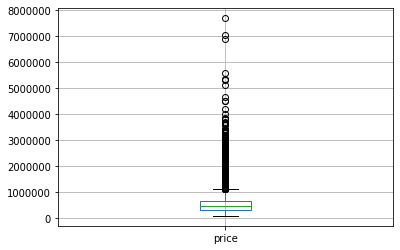

In [41]:
df.boxplot(column="price")

Z boxplotu je zrejmé, že náš dataset v stĺpci `price` obsahuje veľké množstvo outlierov.

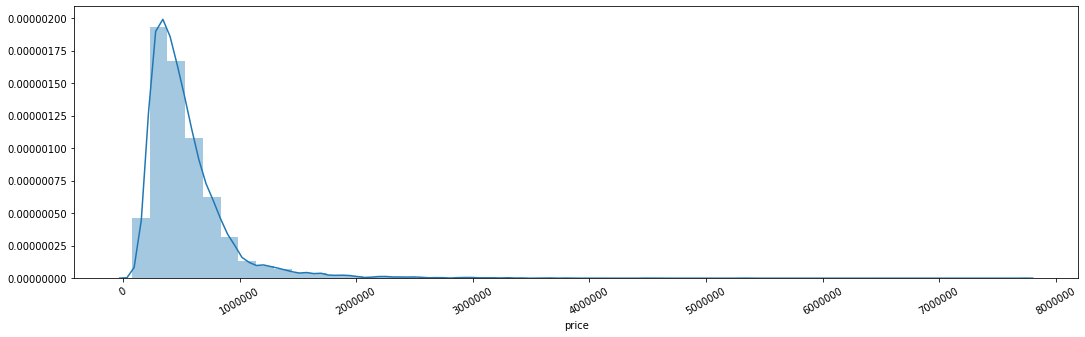

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 5)

plt.xticks(rotation=30)
# ax = sns.boxplot(x="Club", y="Age", data=df_epl_players)
ax = sns.distplot(df["price"], bins=50)
# g.set_xticklabels(labels="", rotation=30)

Stĺpec `price` opisuje cenu, za ktorú bola nehnuteľnosť predaná.

#### Stĺpec bedrooms

Tento stĺpec označuje počet spální v nehnuteľnosti.

In [43]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Ako je možné vidieť, hodnoty stĺpca `bedrooms` sa pohybujú v rozmedzí 1 až 33, najpočetnejšie zastúpenie majú budovy s tromi spálňami.

#### Stĺpec bathrooms

In [44]:
df["bathrooms"].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [45]:
df['bathrooms'][df['bathrooms'] % 1 == 0].count()

6710

In [46]:
df['bathrooms'][df['bathrooms'] % 1 != 0].count()

14903

Stĺpec `bathrooms` obsahuje aj desatinné čísla, pretože za plnohodnotnú kúpelňu sa považuje iba taká, ktorá obsahuje umývadlo, sprchový kút, vaňu a záchod. Ak kúpelňa neobsahuje niektorú z týchto položiek, je hodnota v tomto stĺpci znížená o 0,25 pre každý chýbajúci prvok vodoinštalácie. 

#### Stĺpec sqft_living

In [47]:
df["sqft_living"].value_counts()

1300    138
1400    135
1440    133
1010    129
1660    129
       ... 
3001      1
4970      1
2905      1
2793      1
1975      1
Name: sqft_living, Length: 1038, dtype: int64

In [48]:
df["sqft_living"].describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

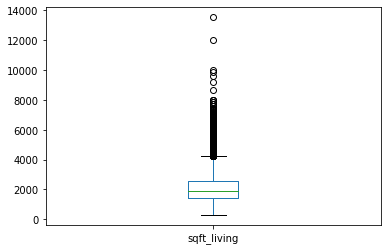

In [49]:
df["sqft_living"].plot(kind='box')

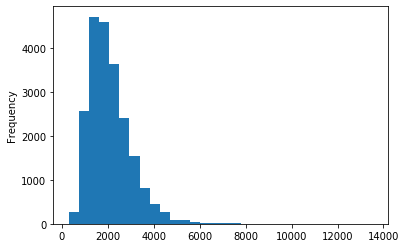

In [50]:
df["sqft_living"].plot(kind='hist', bins=30)

Stĺpec `sqft_living` udáva rozlohu obytnej časti nehnuteľnosti v štvorcových stopách, pričom 1 meter štvorcový = 10.7639104 sq ft

#### Stĺpec sqft_lot	

In [51]:
df["sqft_lot"].value_counts()

5000     358
6000     290
4000     251
7200     220
4800     120
        ... 
38884      1
17313      1
35752      1
937        1
14321      1
Name: sqft_lot, Length: 9782, dtype: int64

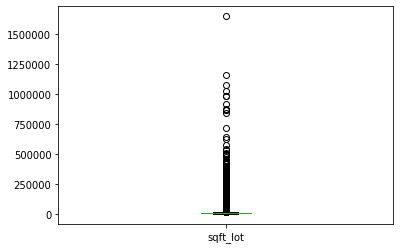

In [52]:
df["sqft_lot"].plot(kind='box')

Tento stĺpec má už na prvý pohľad veľmi vysoký rozptyl hodnôt.

In [53]:
df["sqft_lot"].describe()

count    2.161300e+04
mean     1.510697e+04
std      4.142051e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068800e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

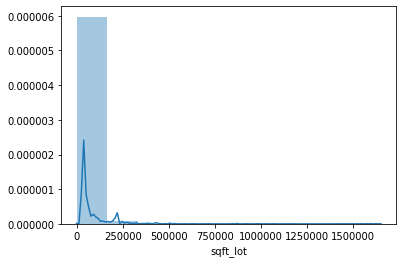

In [54]:
sns.distplot(df["sqft_lot"], bins = 10)

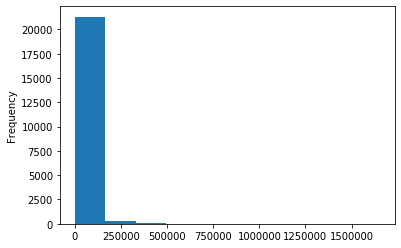

In [55]:
df["sqft_lot"].plot(kind='hist')

#### Stĺpec floors

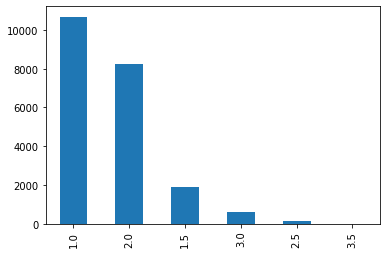

In [49]:
df["floors"].value_counts().plot(kind='bar')

Stĺpec `floors` vyjadruje počet poschodí. Nachádzajú sa tu však aj hodnoty s granularitou 0.5, čo znamená, že sa môže jednať o *Floor Area Ratio (FAR)*, ktoré je vyjadrené ako podiel celkovej plochy poschodia a veľkosti plochy pozemku, na ktorom je budova s poschodím postavená.
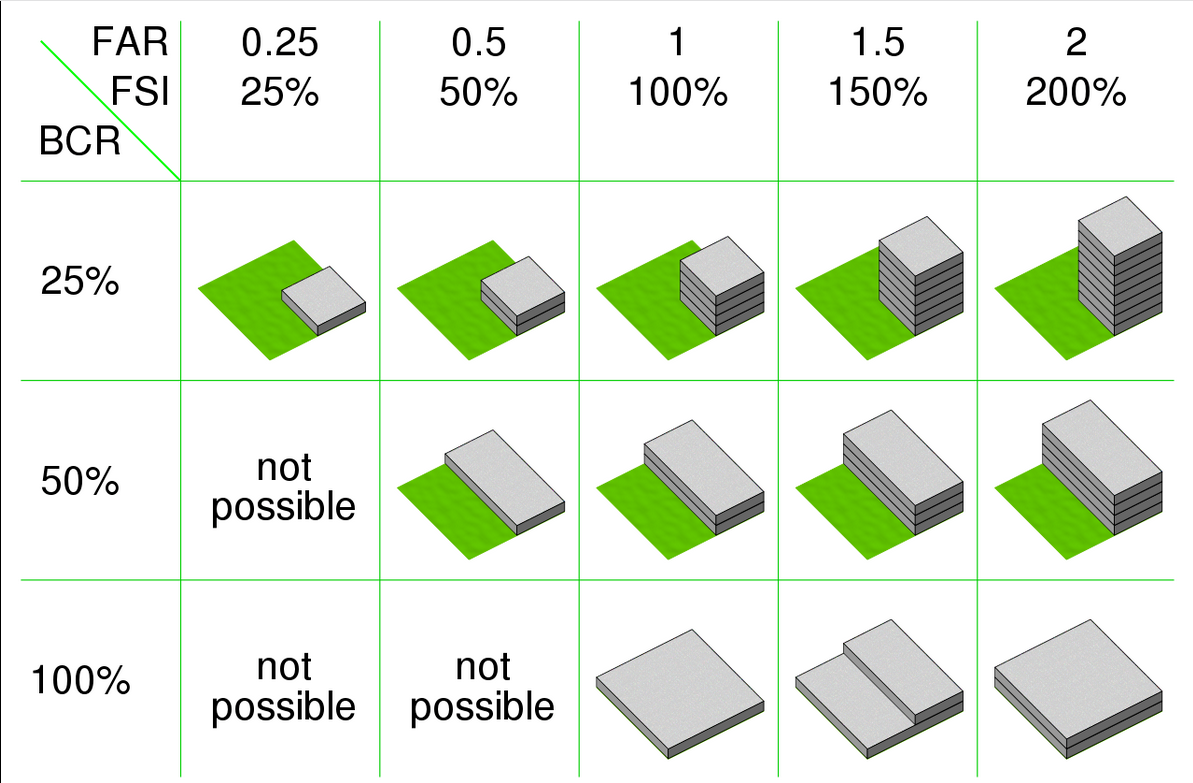

#### Stĺpec waterfront

In [58]:
df["waterfront"].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

Stĺpec `waterfront` je binárnou reprezentáciou toho, či z nehnuteľnosti je výhľad na pobrežie.

#### Stĺpec view

In [59]:
df["view"].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [60]:
df['view'][df['view'] > 0].count()

2124

Stĺpec `view` vyjadruje kvalitu výhľadu z nehnuteľnosti, pričom 4 je najlepší výhľad a 0 naopak najhorší.

Len 2124 nehnuteľností má označenie adekvátneho výhľadu.

#### Stĺpec condition

In [61]:
df["condition"].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

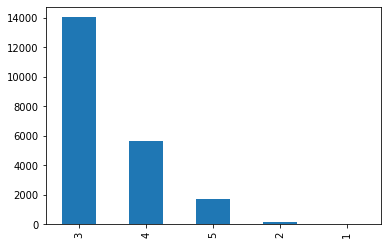

In [53]:
df["condition"].value_counts().plot(kind='bar')

Stĺpec `condition` vyjadruje stav, v akom sa nehnuteľnosť nachádza, 5 reprezentuje výborný stav, budovy označené číslom 1 nosia smutnú nálepku zlého technického stavu.

#### Stĺpec grade

In [63]:
df["grade"].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

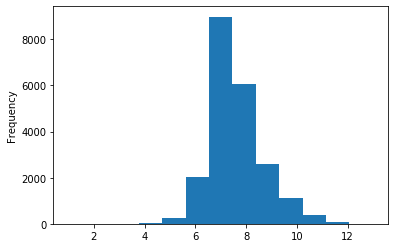

In [64]:
df["grade"].plot.hist(bins=13)

Stĺpec `grade` reprezentuje kvalitu budovy, pričom v sebe kombinuje hodnotenie konštrukčného návrhu a dizajnu nábytku a dekoru. Je vyjadrený hodnotami od 1 do 13.

#### Stĺpec sqft_above

In [65]:
df["sqft_above"].value_counts()

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2665      1
2601      1
440       1
2473      1
1975      1
Name: sqft_above, Length: 946, dtype: int64

In [66]:
df["sqft_above"].describe()

count    21613.000000
mean      1788.390691
std        828.090978
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

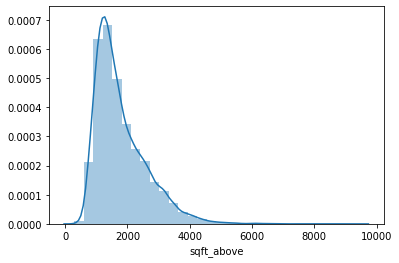

In [67]:
sns.distplot(df["sqft_above"], bins=30)

Stĺpec `sqft_above` vyjadruje obytnú plochu nehnuteľnosti, ktorá sa nachádza v nadzemnej časti budovy.

#### Stĺpec sqft_basement

In [68]:
df["sqft_basement"].value_counts()

0       13126
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [22]:
df["sqft_basement"].describe()

count    21613.000000
mean       291.509045
std        442.575043
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [70]:
df['sqft_basement'][df['sqft_basement'] > 0].count()

8487

Iba 8487 nehnuteľností má suterén.

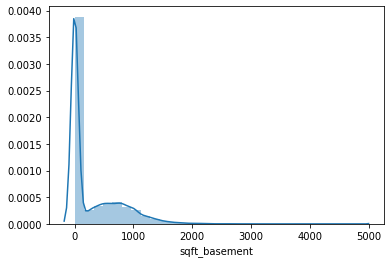

In [71]:
sns.distplot(df["sqft_basement"], bins=30)

Stĺpec `sqft_basement` vyjadruje rozlohu suterénu budovy. Pokiaľ budova suterénom nedisponuje, je táto hodnota nastavená na 0, čomu zodpovedá 13126 záznamov.

#### Stĺpec yr_built

In [72]:
df["yr_built"].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [73]:
df["yr_built"].min()

1900

In [74]:
df["yr_built"].max()

2015

In [75]:
df["yr_built"].mode()

0    2014
dtype: int64

In [76]:
df['yr_built'][df['yr_built'] > 2003].count()

3592

Stĺpec `yr_built` reprezentuje rok, v ktorom bola nehnuteľnosť postavená. Najčastejšou hodnotou (modus) je rok 2014, najviac sa teda predalo novostavieb. Budovy, ktorých vek je do 10 rokov tvoria 3592 predajov.  

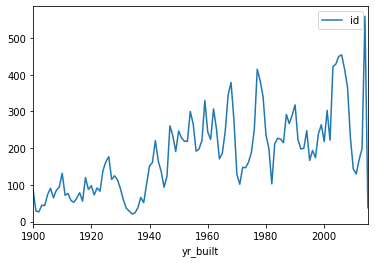

In [40]:
df_id_uniq = df.drop_duplicates(subset=["id"])
df_id_uniq.groupby(['yr_built']).agg({"id":"count"}).plot.line()

Graf nám zobrazuje početnosť nehnuteľností pre jednotlivé roky, v ktorých boli postavené

#### Stĺpec yr_renovated

In [77]:
df["yr_renovated"].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [78]:
df['yr_renovated'][df['yr_renovated'] > 0].count()

914

Iba 914 budov prešlo rekonštrukciou.

In [79]:
df['yr_renovated'][(0 < df['yr_renovated']) & (df['yr_renovated'] < df['yr_built'])].count()

0

Stĺpec `yr_renovated` vyjadruje rok, kedy došlo k rekonštrukcii nehnuteľnosti. Pokiaľ ide o budovu v pôvodnom stave, stĺpec obsahuje hodnotu 0. Dataset bol skontrolovaný pre chybne zadané hodnoty (`yr_renovated` menší ako `yr_built`).

#### Stĺpec zipcode

In [80]:
df["zipcode"].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Stĺpec `zipcode` zastupuje PSČ, v ktorom sa daná nehnuteľnosť nachádza. Celkovo v datasete identifikujeme 70 unikátnych PSČ.

#### Stĺpec lat

In [81]:
df["lat"].value_counts()

47.5491    17
47.6846    17
47.6624    17
47.5322    17
47.6711    16
           ..
47.4686     1
47.2495     1
47.4237     1
47.4142     1
47.2715     1
Name: lat, Length: 5034, dtype: int64

In [82]:
df["lat"].min()

47.1559

In [83]:
df["lat"].max()

47.7776

Stĺpec `lat` vyjadruje zemepisnú šírku ako prvú časť súradnicového systému. Reprezentuje uhlovú vzdialenosť lokalizovaného bodu od rovníka. 

#### Stĺpec long

In [84]:
df["long"].value_counts()

-122.290    116
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-122.499      1
-121.792      1
-122.512      1
-122.484      1
-121.893      1
Name: long, Length: 752, dtype: int64

In [85]:
df["long"].min()

-122.51899999999999

In [86]:
df["long"].max()

-121.315

Stĺpec `long` vyjadruje zemepisnú dĺžku ako druhú časť súradnicového systému. Reprezentuje uhlovú vzdialenosť medzi hlavným poludníkom a poludníkom prechádzajúcim lokalizovaným bodom.

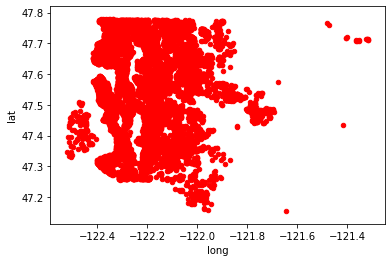

In [87]:
df.plot.scatter(x='long', y='lat', c='red')

Mapa vytvorená vizualizáciou všetkých bodov. 

#### Stĺpec sqft_living15

In [88]:
df["sqft_living15"].value_counts()

1540    197
1440    195
1560    192
1500    181
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

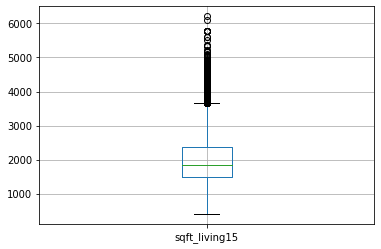

In [54]:
df.boxplot(column="sqft_living15")

Stĺpec je charakteristikou rozlohy obytného priestoru pre najbližších 15 susedných nehnuteľností, môžeme pozorovať veľký počet vychýlených hodnôt

#### Stĺpec sqft_lot15

In [89]:
df["sqft_lot15"].value_counts()

5000      427
4000      357
6000      289
7200      211
4800      145
         ... 
8989        1
871200      1
809         1
4907        1
6147        1
Name: sqft_lot15, Length: 8689, dtype: int64

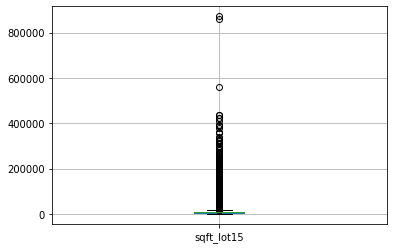

In [55]:
df.boxplot(column="sqft_lot15")

Podobne ako pri stĺpci `sqft_lot`, aj pri stĺpci popisujpcom rozlohu celého pozemku pre najbližších 15 susedných pozemkov pozorujeme pestrú škálu vychýlených hodnôt

### Párová analýza atribútov

#### Analýza dvojíc spojitých atribútov

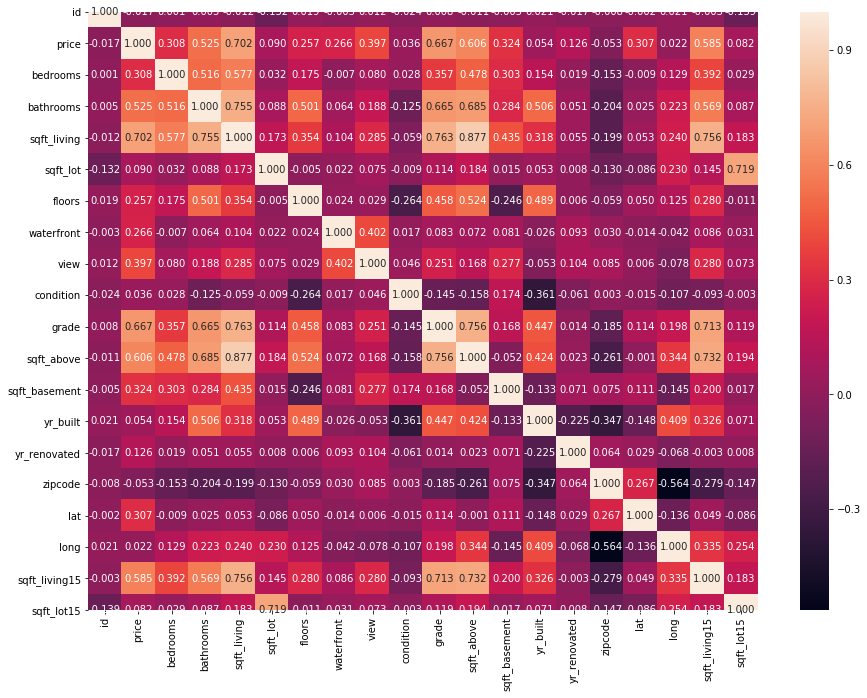

In [65]:
fig, ax = plt.subplots(figsize=(15,11))
sns.heatmap(df.corr(), ax=ax, annot=True, fmt=".3f")

Z teplotnej mapy vidíme...

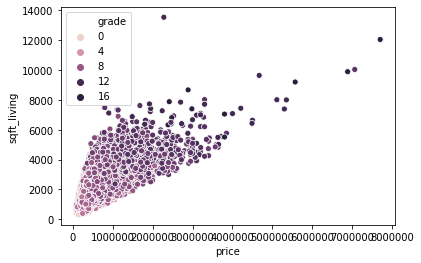

In [68]:
sns.scatterplot(df["price"], df["sqft_living"], hue=df["grade"])

#### Analýza kombinácií spojitého a kategorického atribútu

#### Analýza dvojíc kategorických atribútov

## Definovanie úlohy objavovania znalostí

Regresia ako vínko.

## Predpokladaný scenár riešenia (problémy)